In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Steps from here
# 1 - sign into kaggle
# 2 - click on 'my account'
# 3 - scroll down to the API section and click get token
# 4 - run this cell and click on the kaggle.json file that should now be in downloads

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# move the authentication key
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# call the kaggle API to get the boston housing data
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
train = pd.read_csv("./train.csv")

In [ ]:
test = pd.read_csv("./test.csv")
pasID = test["PassengerId"]

In [ ]:
# basic statistics
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [ ]:
test.describe

<bound method NDFrame.describe of      PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]>

In [ ]:
# drop some columns that probably aren't going to have any significance
train = train.drop("Name", axis=1)
test = test.drop("Name", axis=1)

In [ ]:
train = train.drop("PassengerId", axis=1)
test = test.drop("PassengerId", axis=1)

In [ ]:
train = train.drop("Ticket", axis=1)
test = test.drop("Ticket", axis=1)

In [ ]:
train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


In [ ]:
# Scikit-Learn has a handy class to take care of this: the SimpleImputer class.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = test[test.isnull().any(axis=1)].head()
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,3,male,NaN,0,0,7.8958,S
22,1,female,NaN,0,0,31.6833,S
29,3,male,NaN,2,0,21.6792,C
33,3,female,NaN,1,2,23.4500,S
36,3,female,NaN,0,0,8.0500,S


In [ ]:
test = test.dropna(subset=["Age"]) 

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = test[test.isnull().any(axis=1)].head()
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [ ]:
test = test.dropna(subset=["Fare"]) 

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = test[test.isnull().any(axis=1)].head()
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


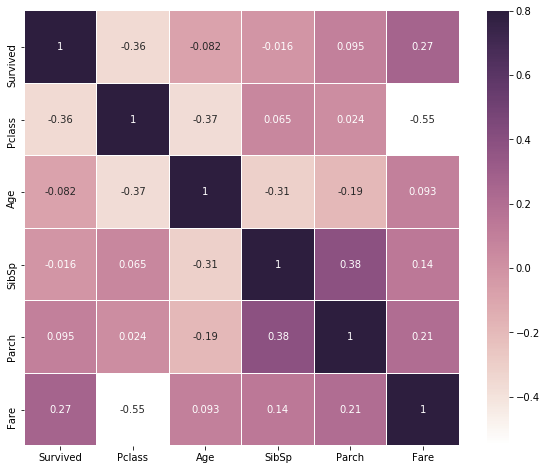

In [ ]:
# next I'm going to do the visualizations
# plot a correlation matrix that is easy to read
import seaborn as sns
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap=cmap,linecolor="white")

At first glance it seems that the fare one pays is the most correlated with survival

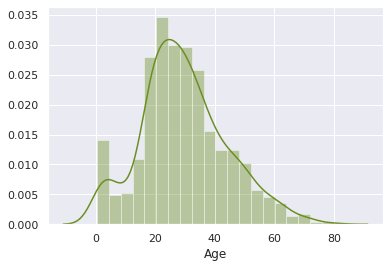

In [ ]:
# plot some distributions
# plot distributions
sns.set()
sns.distplot(train['Age'], color="olivedrab")

Age seems to follow a normal distribution

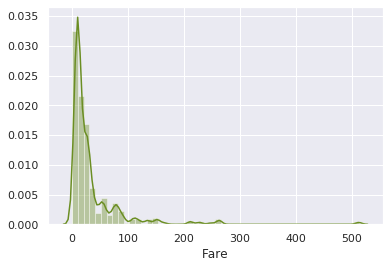

In [ ]:
sns.set()
sns.distplot(train['Fare'], color="olivedrab")

Fare is skewed right

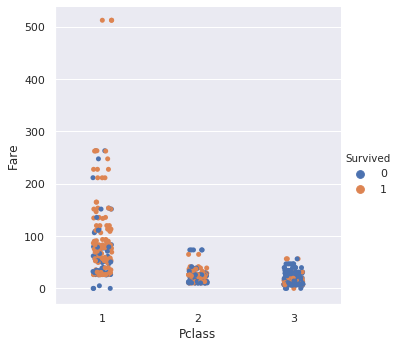

In [ ]:
# lets see the classes
# lets see which regions have the highest charges
sns.catplot(x="Pclass", y="Fare", hue="Survived", data=train)

Its starting to seem like a higher correlation between class and survival exists than previously known

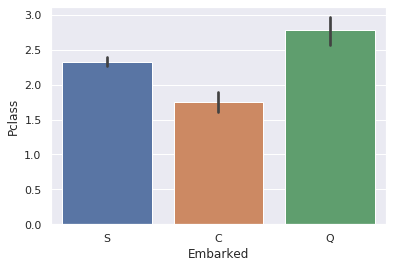

In [ ]:
# inspect whether the ports have any significance
sns.barplot(x="Embarked", y="Pclass", data=train)

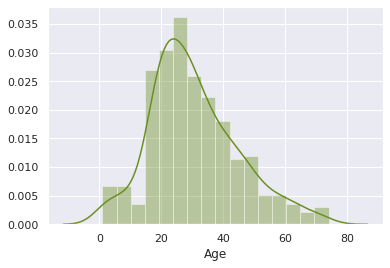

In [ ]:
# distribution of those who died vs age
sns.distplot(train[(train["Survived"] == 0)]["Age"], color="olivedrab")

It seems like those in shape helped the young and elderly to safety at their own demise.

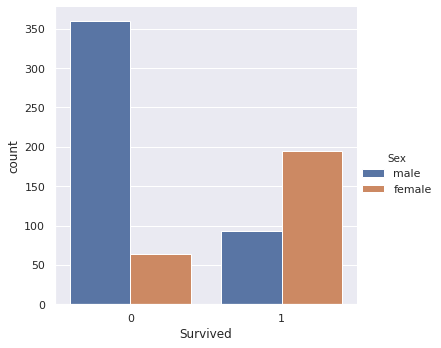

In [ ]:
# what is the ratio of survivors to non survivors?
sns.catplot(x="Survived", kind="count", hue="Sex", data=train)

So a mid 20's to mid 30's aged male was very likely to die on the titanic. 

In [ ]:
# feature engineering
age_category = pd.cut(train.Age, bins=[0,2,10,20,35,65,99],labels=['baby', 'child', 'teenager', 'adult', 'middleaged', 'elderly'])
train.insert(5,'age_group', age_category)
test.insert(5,'age_group', age_category)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,age_group,Parch,Fare,Embarked
0,0,3,male,22.0,1,adult,0,7.2500,S
1,1,1,female,38.0,1,middleaged,0,71.2833,C
2,1,3,female,26.0,0,adult,0,7.9250,S
3,1,1,female,35.0,1,adult,0,53.1000,S
4,0,3,male,35.0,0,adult,0,8.0500,S


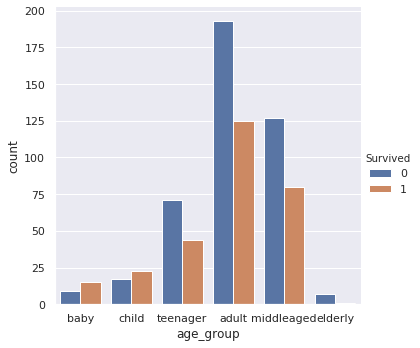

In [ ]:
sns.catplot(x="age_group", kind="count", hue="Survived", data=train)

In [ ]:
# split data sets
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.copy()
X_train.shape, y_train.shape, X_test.shape

((712, 8), (712,), (331, 8))

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = X_test[X_test.isnull().any(axis=1)].head()
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,age_group,Fare,Embarked
5,3,male,14.0,0,0,NaN,9.2250,S
17,3,male,21.0,0,0,NaN,7.2250,C
19,3,female,45.0,0,0,NaN,7.2250,C
26,1,female,22.0,0,1,NaN,61.9792,C
28,1,male,41.0,0,0,NaN,30.5000,S


In [ ]:
X_test = X_test.dropna(subset=["age_group"])

In [ ]:
# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Sex", "age_group", "Embarked"]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

training_prepared = full_pipeline.fit_transform(X_train)
test_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
training_prepared.shape

(712, 16)

In [ ]:
test_prepared.shape

(263, 16)

In [ ]:
# first I Will try a decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(training_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import mean_squared_error
training_predictions = tree_reg.predict(training_prepared)
tree_mse = mean_squared_error(y_train, training_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0865484644815831

Possibly overfit

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(training_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rmf_predictions = forest_reg.predict(training_prepared)
forest_mse = mean_squared_error(y_train, rmf_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.161442184173871

In [ ]:
b

89.17978994135196

In [ ]:
# support vector machine
from sklearn.svm import SVC

# Gaussian RBF object                   
clf_rbf = SVC(kernel='rbf', gamma=0.05, C=5)

# fit parameters
clf_rbf.fit(training_prepared, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# reusable function that I will be using the report the different kernel results
def report_results(X, y, clf):
  predicted = clf.predict(X)
  #results = confusion_matrix(y, predicted)
  #print('Confusion Matrix: ')
  #print(results)
  print('Accuracy Score: ', accuracy_score(y, predicted))
  print("Report: ")
  print(classification_report(y, predicted))

In [ ]:
report_results(training_prepared, y_train, clf_rbf)

Accuracy Score:  0.8398876404494382
Report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       424
           1       0.85      0.73      0.79       288

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedShuffleSplit

n_estimators = [10,30,50,70,80,150,165]
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters_bagging = {'n_estimators':n_estimators, }

clf_bagging = GridSearchCV(BaggingClassifier(base_estimator= None,
                                      bootstrap_features=False),
                                 param_grid=parameters_bagging,
                                 cv=cv,
                                 n_jobs = -1)

clf_bagging.fit(training_prepared, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 165]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf_bagging.best_params_

{'n_estimators': 70}

In [ ]:
clf_bagging_done = clf_bagging.best_estimator_

In [ ]:
clf_bagging_done.fit(training_prepared, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=70,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
clf_bagging_done.score(training_prepared, y_train)*100

98.45505617977528

In [ ]:
pred = clf_bagging_done.predict(test_prepared)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])